In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
#Load Bank personal loan file
loan_data = pd.read_csv(r"C:\Users\I330586\Downloads\Bank_Personal_Loan_Modelling.csv")

In [5]:
#Peek into the data
loan_data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


### 1. Read the column description and ensure you understand each attribute well 

In [6]:
#Total number of rows and cols
loan_data.shape

(5000, 14)

In [7]:
#number of points & numer of features
print('No. of features:', loan_data.shape[1])
print('No. of Datapoints:', loan_data.shape[0])

No. of features: 14
No. of Datapoints: 5000


In [8]:
#Display all the features in dataset
loan_data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [9]:
#finding unique data
loan_data.apply(lambda x: len(x.unique()))

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

# Observation:
1. The variable ID does not provide any useful information in predicting if a customer takes a personal loan or not, we can drop    it from the data set.
2. Personal Loan variable is the target variable or the class label
3. Personal Loan, Securities Account, CD Account, Online, CreditCard come under binary category of variables
4. Family and Education come under ordinal categorical variables
5. ID and ZIP code are nominal variables, it can be dropped 
6. Age, Experience, Income, CCAvg, Mortgage are Interval or continous variables


In [10]:
#displays the data type
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [11]:
#To check if any missing values are there in any variable
loan_data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

## Observation:
There are no missing values that are observed in the data set.

In [12]:
#Five point summary for each variable
loan_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


## Observation:
1. Age is normally distributed where mean is almost close to median
1. Experience here has a min of -3, which is not valid, needs to be rectified 

### 2. Study the data distribution in each attribute, share your findings

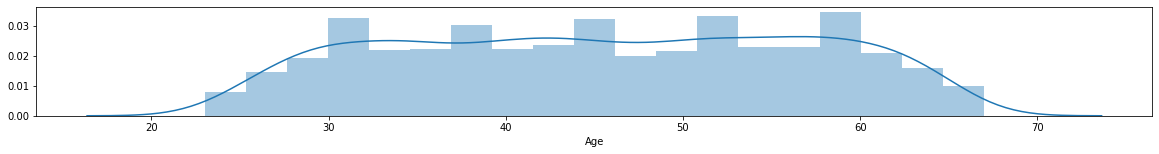

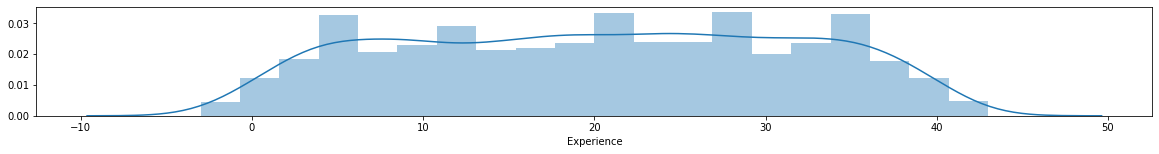

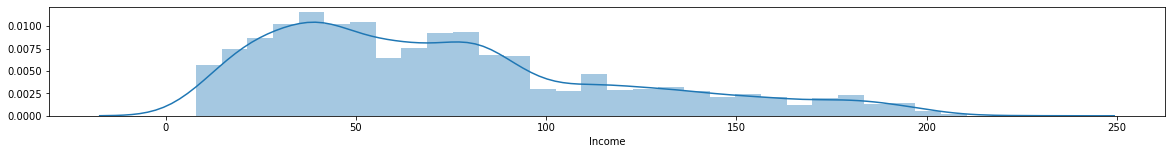

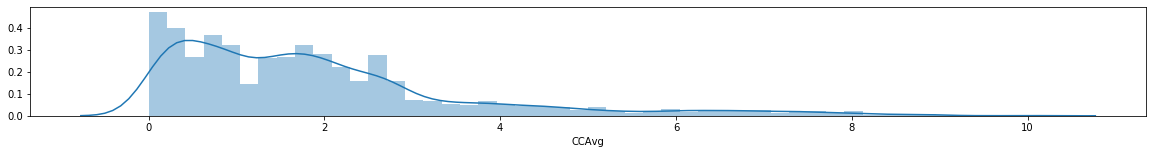

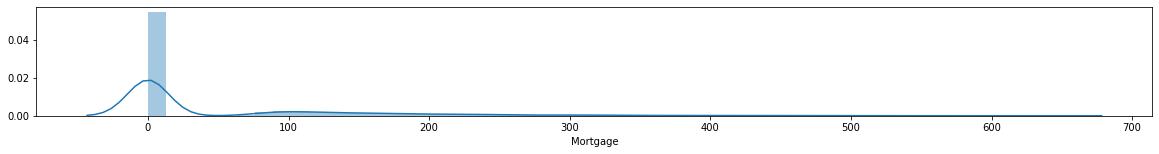

In [13]:
#plots to show the histogram and distribution 
col=['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']
for ind in col:
  plt.figure(figsize=(20,2))
  sns.distplot(loan_data[ind])
  plt.show()

## Observation:
1. Age and Experience are normally distributed, with avg age between 30 to 60
2. Income, CCAvg and mortgage are right or positively skewed, ie mean > median

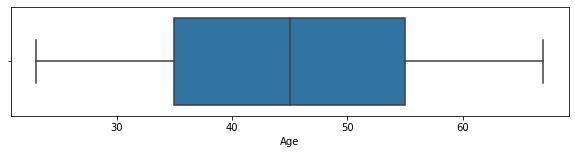

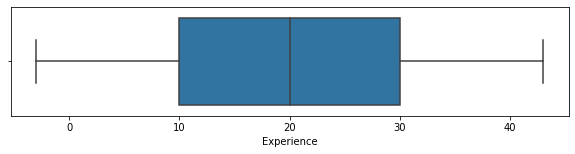

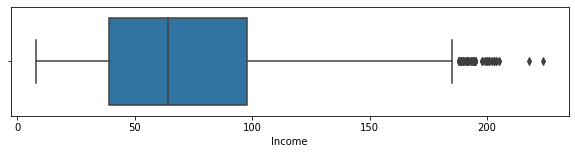

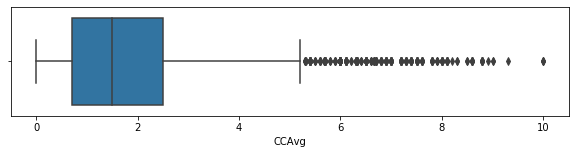

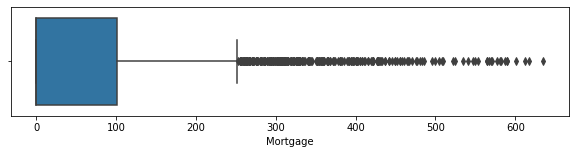

In [14]:
# EDA Checking the presence of outliers in case of continous variables
col=['Age','Experience','Income', 'CCAvg', 'Mortgage']
for ind in col:
  plt.figure(figsize=(10,2))
  sns.boxplot(data = loan_data, x = ind)
  plt.show()

In [401]:
col=['Age','Experience','Income', 'CCAvg', 'Mortgage']
for ind in col:
  Q1=np.percentile(loan_data[ind], 25)
  Q3=np.percentile(loan_data[ind], 75)
  IQR=Q3-Q1
  lower_whisker=Q1-IQR*1.5
  upper_whisker=Q3+IQR*1.5
  outlayers=loan_data[(loan_data[ind]>upper_whisker)|(loan_data[ind]<lower_whisker)][ind]
  print('NO of outlayers for {} is: {}'.format(ind, len(outlayers)))

NO of outlayers for Age is: 0
NO of outlayers for Experience is: 0
NO of outlayers for Income is: 96
NO of outlayers for CCAvg is: 324
NO of outlayers for Mortgage is: 291


## Observation:

1. Age and Experience do not have outliers
2. Income, CCAvg, Mortgage have outliers

In [15]:
# Replacing negative experience with median value of the Experience column
negExp = loan_data[loan_data['Experience'] < 0]
posExp = loan_data[loan_data['Experience'] > 0]

In [16]:
negExp["Experience"].value_counts()

-1    33
-2    15
-3     4
Name: Experience, dtype: int64

In [17]:
# Replaced with median value
negval=[-3,-2,-1]

for i in negval:
    loan_data['Experience'] = loan_data['Experience'].replace(negval,np.median(posExp['Experience']))

In [18]:
loan_data["Experience"].describe()

count    5000.00000
mean       20.33800
std        11.25319
min         0.00000
25%        11.00000
50%        21.00000
75%        30.00000
max        43.00000
Name: Experience, dtype: float64

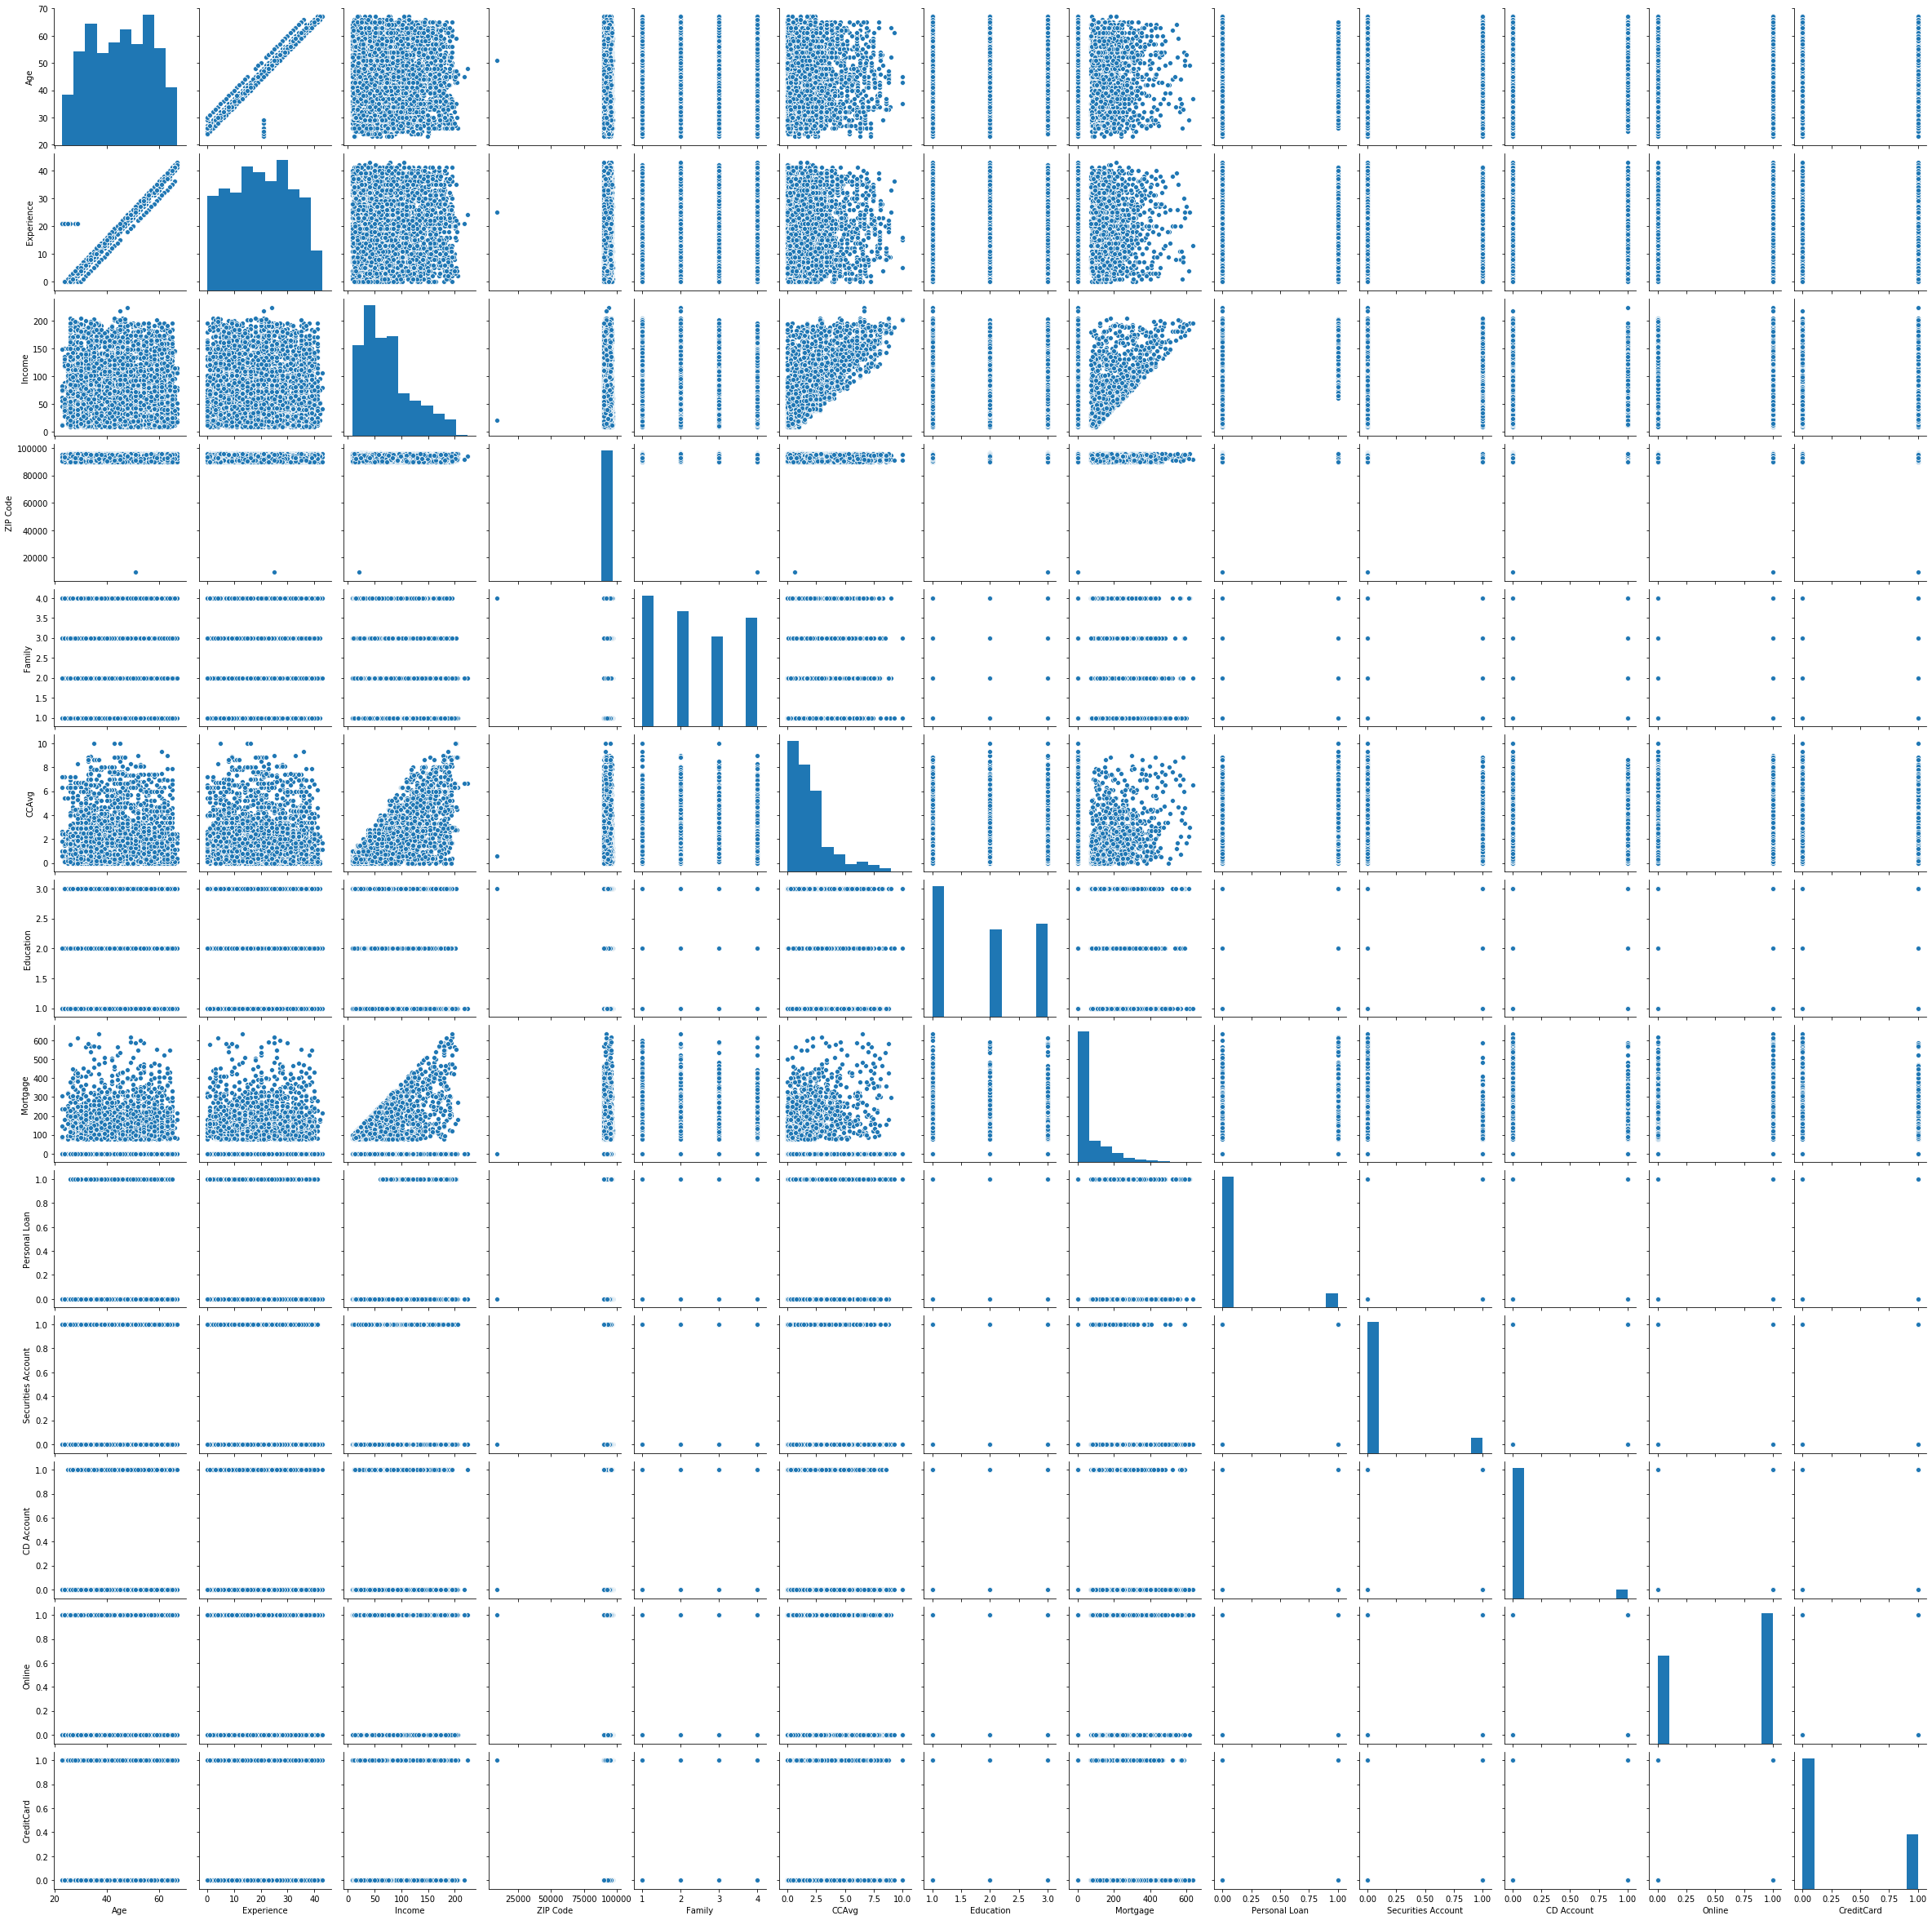

In [407]:
#to check the association with all the variables excluding ID
sns.pairplot(loan_data.iloc[:,1:])

## Observation:
1. It can be seen that Age and experience are highly collinear 

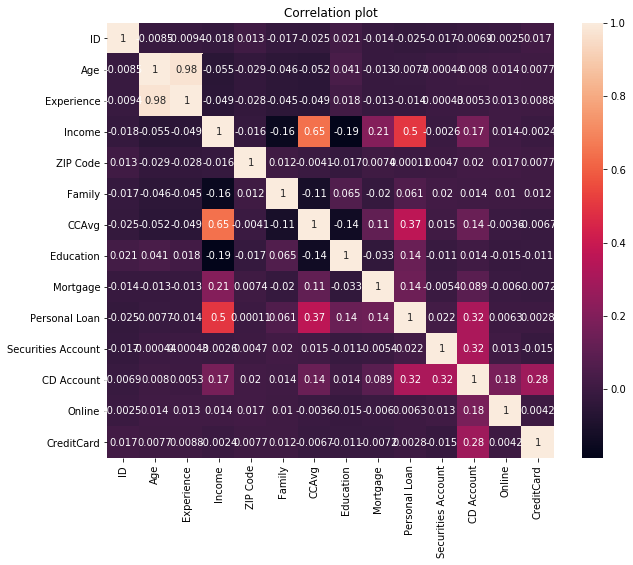

In [19]:
#Finding corelation between features
cor = loan_data.corr()
plt.figure(figsize=(10,8))
plt.title("Correlation plot")
sns.heatmap(cor,annot=True)
plt.show()

## Observation:
Here as well in heat it can seen that Age and Experiance are highly correlated, and one of the feature can be dropped to avoid bias

In [20]:
# Dropping Age, Zip code and ID from the dataset
loan_data = loan_data.drop(['Age'],axis=1)
loan_data = loan_data.drop(['ZIP Code'],axis=1)
loan_data = loan_data.drop(['ID'],axis=1)

In [21]:
loan_data.columns

Index(['Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard'],
      dtype='object')

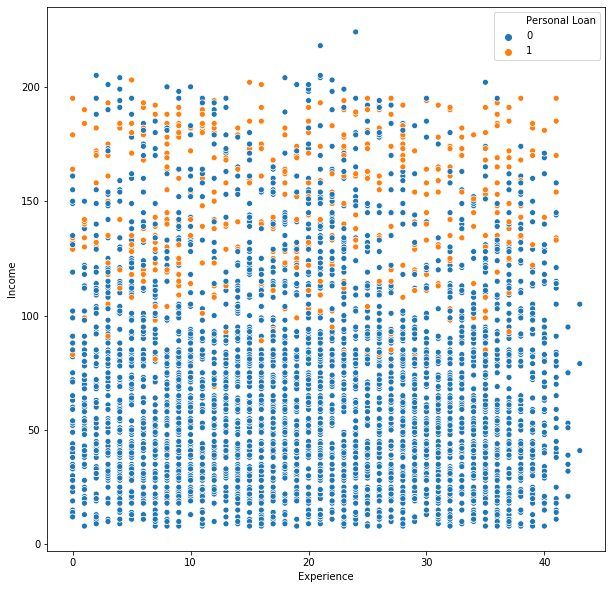

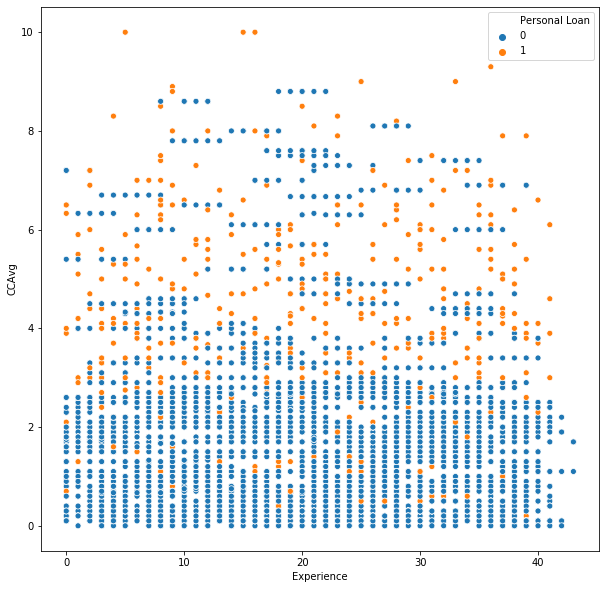

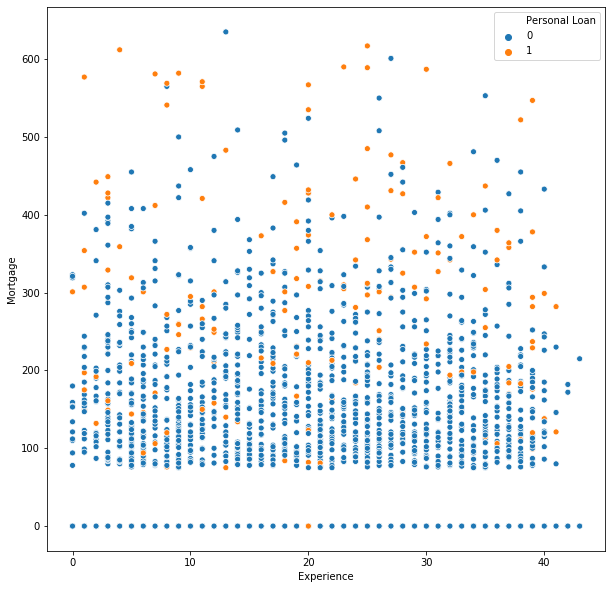

In [22]:
#Plotting scatterplot for multivariate variables
col=['Income','CCAvg','Mortgage']
for i in col :
    plt.figure(figsize=(10,10))
    sns.scatterplot(x='Experience',y=i,hue='Personal Loan',data=loan_data)
plt.show()

## Observation:
1. Customers with higher income have taken loan
2. Customers with higher CCAvg have taken loan 
3. Customers who have taken loan have higher mortgage

### 3. Get the target column distribution.

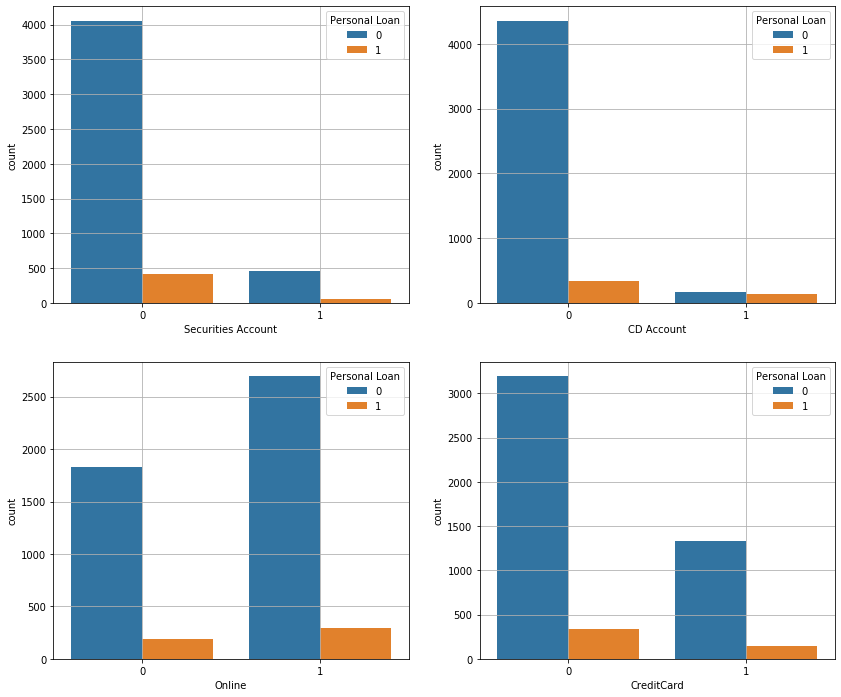

In [23]:
#Plotting countplot for Categorical variables
col=['Securities Account', 'CD Account', 'Online', 'CreditCard']
plt.figure(figsize=(14,12))
k=1
for i in col :
    plt.subplot(2,2,k)
    sns.countplot(x=i,hue='Personal Loan',data=loan_data)
    k=k+1
    plt.grid(True)
plt.show()

## Observation
1. Customers with no securities account , CD account and credit card have taken loan
2. More no of Customers with online account have taken loan

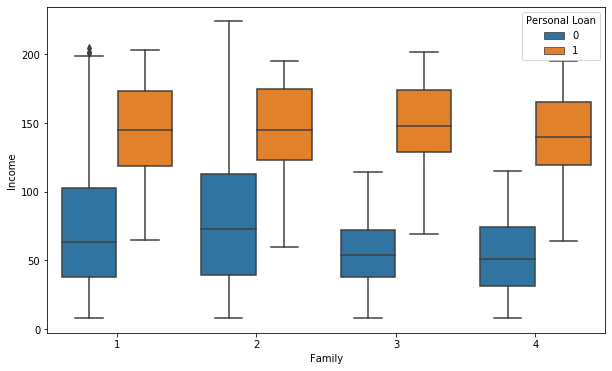

In [24]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Family',y='Income',hue='Personal Loan',data=loan_data)
plt.show()

## Observation:
Irrespective of the family size, customers with higher income have taken loan

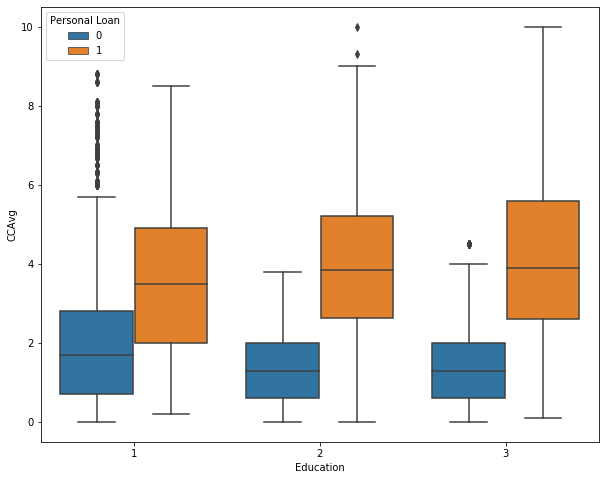

In [25]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Education',y='CCAvg',hue='Personal Loan',data=loan_data)
plt.show()

## Observation:
Irrespective of education levels, customers with CCAvg > 2 have taken loan

In [26]:
#shows the no of people who have taken loan in previous year
loan_data["Personal Loan"].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

## Observation:
It can be seen that the data set is a imbalanced 

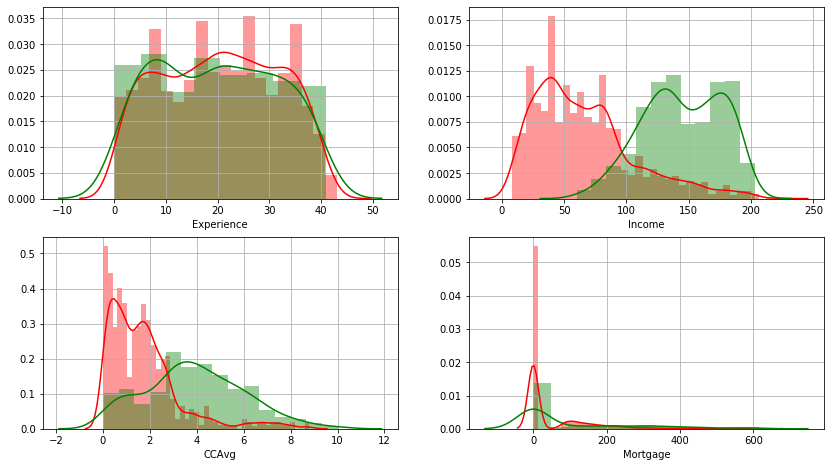

In [27]:
col=['Experience', 'Income', 'CCAvg', 'Mortgage']
plt.figure(figsize=(14,12))
k=1
for i in col:
    plt.subplot(3,2,k)
    sns.distplot( loan_data[loan_data['Personal Loan'] == 0][i], color = 'r')
    sns.distplot( loan_data[loan_data['Personal Loan'] == 1][i], color = 'g')
    k=k+1
    plt.grid(True)
plt.show()

## Observation:
1. Customers with income in range 100 to 200 have taken loan
2. CCAvg of 2.5 to 6.5 have a better chance to take loan
3. Few customers have a mortgage who have taken loan

### 4.  Split the data into training and test set in the ratio of 70:30 respectively 

In [28]:
#Class label is having imbalance data so we will re-balance the class variable using upsample method
#splitting major and minor class data frames

df_majority=loan_data[loan_data['Personal Loan']==0]
df_minority=loan_data[loan_data['Personal Loan']==1]

print("Majority class shape {}".format(df_majority.shape))
print("Minority class shape {}".format(df_minority.shape))

Majority class shape (4520, 11)
Minority class shape (480, 11)


In [29]:
from sklearn.utils import resample
#Upsampling
df_minority_upsample=resample(df_minority,n_samples=4520)
df_minority_upsample['Personal Loan'].value_counts()

1    4520
Name: Personal Loan, dtype: int64

In [30]:
#Joining both dataframes
df=pd.concat([df_majority,df_minority_upsample])

In [31]:
df['Personal Loan'].value_counts()

1    4520
0    4520
Name: Personal Loan, dtype: int64

In [32]:
#Seperating x and y variables as training and testing data set
x = df.drop(['Personal Loan'],axis=1)
y = df['Personal Loan']

In [33]:
#Forming the training and testing set
#We will use 70% of data for training and 30% for testing.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [34]:
x_train.head()

,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
3563,27,139,1,0.9,3,0,0,0,0,0
2304,2,170,3,4.7,1,0,0,0,1,0
981,12,142,3,2.3,2,0,0,1,1,1
2292,33,170,2,2.1,2,0,0,0,0,0
4175,17,154,3,4.9,1,0,0,1,1,1


In [37]:
y_train.value_counts()

1    3170
0    3158
Name: Personal Loan, dtype: int64

In [38]:
print("{0:0.2f}% data is in training set-x".format((len(x_train)/len(df.index)) * 100))
print("{0:0.2f}% data is in test set-x".format((len(x_test)/len(df.index)) * 100))
print("{0:0.2f}% data is in training set-y".format((len(y_train)/len(df.index)) * 100))
print("{0:0.2f}% data is in test set-y".format((len(y_test)/len(df.index)) * 100))

70.00% data is in training set-x
30.00% data is in test set-x
70.00% data is in training set-y
30.00% data is in test set-y


### 5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a customer buying personal loans and print the confusion matrix for the models

## Train data set with Naive Bayes Algorithm

In [39]:
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes

# creatw the model
loan_naive_model = GaussianNB()

loan_naive_model.fit(x_train, y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

## Performance of our model with training data

In [42]:
loan_train_predict_naive = loan_naive_model.predict(x_train)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, loan_train_predict_naive)))
print()

Model Accuracy: 0.8263



## Performance of our model with testing data

In [43]:
loan_test_predict_naive = loan_naive_model.predict(x_test)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, loan_test_predict_naive)))
print()

Model Accuracy: 0.8256



## Lets check the confusion matrix and classification report

Confusion Matrix


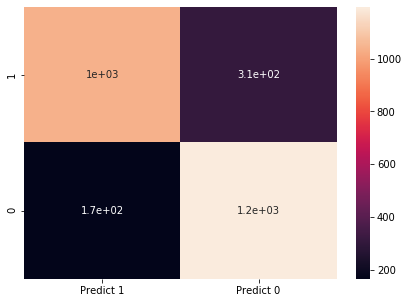

In [44]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, loan_test_predict_naive, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

## Observation:

The confusion matrix

True Positives (TP): we correctly predicted that these customers have taken loan - 1100

True Negatives (TN): we correctly predicted that these customers have not taken loan - 1200

False Positives (FP): we incorrectly predicted that these customers have taken loan (a "Type I error") - 170

False Negatives (FN): we incorrectly predicted that these customers have not taken loan (a "Type II error") - 310

In [45]:
print("Classification Report")
print(metrics.classification_report(y_test, loan_test_predict_naive, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.86      0.77      0.82      1350
           0       0.80      0.88      0.83      1362

    accuracy                           0.83      2712
   macro avg       0.83      0.83      0.83      2712
weighted avg       0.83      0.83      0.83      2712



In [49]:
#scaling the data set 

from sklearn.preprocessing import scale
x_train_scaled = scale(x_train)
x_test_scaled = scale(x_test) 

## Train data set with Logistic Regression

In [50]:
#Traning the data using Logistic regression Algorithm
from sklearn.linear_model import LogisticRegression

# Fit the model on train
loan_logistic_model = LogisticRegression(solver="liblinear",  C = 1, penalty = 'l2')
loan_logistic_model.fit(x_train_scaled, y_train)

#predict on test
y_predict = loan_logistic_model.predict(x_test_scaled)

model_score = loan_logistic_model.score(x_test_scaled, y_test)
print('Accuracy -', model_score)

Accuracy - 0.9037610619469026


In [51]:
#Training the data with Grid search 
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
tuned_parameters = [{'C': [10**-4, 10**-2, 10**0, 10**2, 10**4, 10**-3, 10**5, 10**-1]}]
  
#Using GridSearchCV
model = GridSearchCV(LogisticRegression(), tuned_parameters, scoring='f1', cv=10)
model.fit(x_train_scaled, y_train)
print(model.best_score_)
print(model.best_estimator_)
print(model.score(x_test_scaled, y_test))

0.8990107752985279
LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
0.9052323454079767


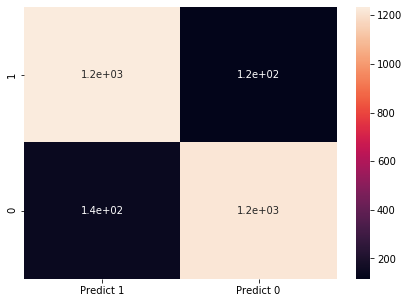

In [52]:
#confusion matrix for Logistic regression model
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

## Observation:

The confusion matrix

True Positives (TP): we correctly predicted that these customers have taken loan - 1200

True Negatives (TN): we correctly predicted that these customers have not taken loan - 1200

False Positives (FP): we incorrectly predicted that these customers have taken loan ("Type I error") - 140

False Negatives (FN): we incorrectly predicted that these customers have not taken loan ("Type II error") - 120

## Train data set with K-NN model

In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score

#Finding the optimal K using cross validation 
# empty list that will hold cv scores
cv_scores = []
mylist = list(range(0,50))
neighbors = list(filter(lambda x: x % 2 != 0, mylist))
# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train_scaled, y_train, cv=10, scoring= 'accuracy')
    cv_scores.append(scores.mean())
# changing to misclassification error
MSE = [1 - x for x in cv_scores]
# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)


The optimal number of neighbors is 1.


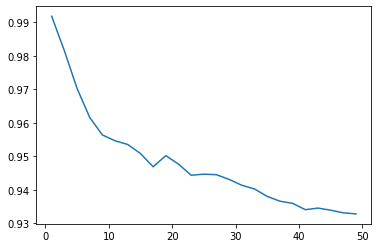

In [54]:
plt.plot(neighbors,cv_scores)

In [55]:
# instantiate learning model k = optimal_k
# To avoid overfitting, taking optimal_k = 3
optimal_k = 3
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)

# fitting the model
knn_optimal.fit(x_train_scaled, y_train)
print(accuracy_score(y_train,knn_optimal.predict(x_train_scaled)))

# predict the response
pred = knn_optimal.predict(x_test_scaled)

# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc))


0.9925726927939317

The accuracy of the knn classifier for k = 3 is 98.598820%


Confusion Matrix


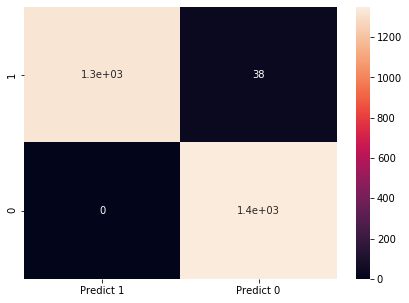

In [56]:
# calculate accuracy measures and confusion matrix

print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, pred)

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

## Observation:
The confusion matrix

True Positives (TP): we correctly predicted that these customers have taken loan - 1300

True Negatives (TN): we correctly predicted that these customers have not taken loan - 1400

False Positives (FP): we incorrectly predicted that these customers have taken loan ("Type I error") - 0

False Negatives (FN): we incorrectly predicted that these customers have not taken loan ("Type II error") - 38

### Give your reasoning on which is the best model in this case and why it performs better?

For predicting if the customer takes loan or not, 

a. kNN model has resulted in best accuracy of 98.598820%

b. Logistic regression accuracy - 90.37%

c. Naive Bayes accuracy - 83.04%

In case of this data set, kNN performs better than logistic regression and Naive bayes algorithms.

1. No Training Period: KNN is called Lazy Learner (Instance based learning). It does not learn anything in the training period. It does not derive any discriminative function from the training data. In other words, there is no training period for it. It stores the training dataset and learns from it only at the time of making real time predictions. This makes the KNN algorithm much faster than other algorithms that require training e.g. SVM, Linear Regression etc.

2. Since the KNN algorithm requires no training before making predictions, new data can be added seamlessly which will not impact the accuracy of the algorithm.

3. KNN is very easy to implement. There are only two parameters required to implement KNN i.e. the value of K and the distance function (e.g. Euclidean or Manhattan etc.)